# COMP24112 - Exercise 3: _Face Recognition_ (25 Marks)

## 1. Task description

You will work on the face recognition and face completion tasks. The provided dataset includes face images of 40 subjects. There are a total of 400 images, with 10 images per subject. Each image contains 32×32=1024 pixels, with 256 grey levels per pixel.

You will be marked for your code presentation, design, results, and report. Please note this notebook should take no more than 10 minutes to run on lab computers. 

## 2. Preparation

### 2.1 Setting up

The functions that you need are defined in the source file we have provided you with. To use them you must import it first:

In [1]:
from lab3lib import load_data, show_single_face, show_faces, partition_data, split_left_right, join_left_right, show_split_faces
import numpy as np
import matplotlib.pyplot as plt


Now you can load the data:

In [2]:
data, labels = load_data()
# data is combined by 400 images, each images contains 32x32=1024 pixels
print(data)
print(len(data[0]))
print(len(data))
print(labels)
print(len(labels))

[[ 75 101 128 ... 118  37  39]
 [110 124 144 ...  33  33  33]
 [ 77 119 142 ...  32  35  35]
 ...
 [121 147 159 ...  37  38  38]
 [ 52  53  51 ...  98 126 141]
 [125  68  60 ...  69  76  87]]
1024
400
[ 1  1  1  1  1  1  1  1  1  1  2  2  2  2  2  2  2  2  2  2  3  3  3  3
  3  3  3  3  3  3  4  4  4  4  4  4  4  4  4  4  5  5  5  5  5  5  5  5
  5  5  6  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  7  8  8
  8  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9  9  9 10 10 10 10 10 10
 10 10 10 10 11 11 11 11 11 11 11 11 11 11 12 12 12 12 12 12 12 12 12 12
 13 13 13 13 13 13 13 13 13 13 14 14 14 14 14 14 14 14 14 14 15 15 15 15
 15 15 15 15 15 15 16 16 16 16 16 16 16 16 16 16 17 17 17 17 17 17 17 17
 17 17 18 18 18 18 18 18 18 18 18 18 19 19 19 19 19 19 19 19 19 19 20 20
 20 20 20 20 20 20 20 20 21 21 21 21 21 21 21 21 21 21 22 22 22 22 22 22
 22 22 22 22 23 23 23 23 23 23 23 23 23 23 24 24 24 24 24 24 24 24 24 24
 25 25 25 25 25 25 25 25 25 25 26 26 26 26 26 26 26 26 26 26 27 27 27

### 2.2 Visualising the dataset

You can observe the faces stored in a data matrix by using the functions `show_single_face()` and `show_faces()`.

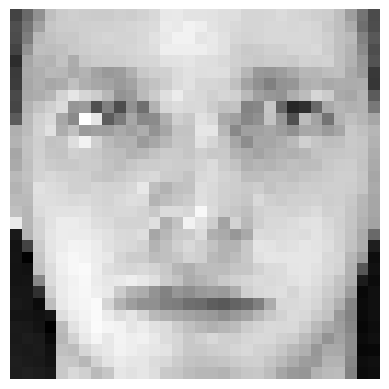

In [3]:
# Display a single example.
show_single_face(data[0, :])

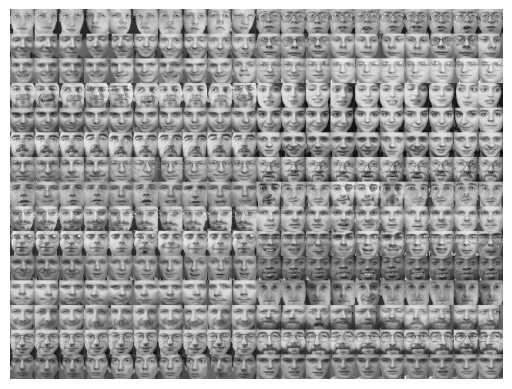

In [4]:
# Display the first 16 examples in a 4x4 grid.
show_faces(data[:300, :], num_per_row=20)

### 2.3 Splitting into the train and test sets

First, normalize your pixel values by 1/255 so that the feature values used in later experiments are between $[0,1]$. In general, the normalization trick can make it easier for your to tune parameters in machine learning experiments.

A data partition function is supplied to facilitate your experiments. It randomly splits the provided data into the training and test sets, where the training set contains $N$ samples per class and the test set contains
the remaining samples. The function takes the labels and the specified number $N$ as the input. And returns the sample indices in the training and test set. For example, the following code divides a given set of 400 samples into a training set containing 3 samples per subject and a test set containing 7 samples per subject:

In [5]:
# normalization, feature values are between[0,1]
data = data / 255

# partition, randomly splits the provided data into training and test data, ratio is 3:7
tr_ind, te_ind = partition_data(labels, num_per_class=3)
tr_data = data[tr_ind, :]
tr_label = labels[tr_ind]
te_data = data[te_ind, :]
te_label = labels[te_ind]
print(labels)
print(tr_label)
print(te_label)

[ 1  1  1  1  1  1  1  1  1  1  2  2  2  2  2  2  2  2  2  2  3  3  3  3
  3  3  3  3  3  3  4  4  4  4  4  4  4  4  4  4  5  5  5  5  5  5  5  5
  5  5  6  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  7  8  8
  8  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9  9  9 10 10 10 10 10 10
 10 10 10 10 11 11 11 11 11 11 11 11 11 11 12 12 12 12 12 12 12 12 12 12
 13 13 13 13 13 13 13 13 13 13 14 14 14 14 14 14 14 14 14 14 15 15 15 15
 15 15 15 15 15 15 16 16 16 16 16 16 16 16 16 16 17 17 17 17 17 17 17 17
 17 17 18 18 18 18 18 18 18 18 18 18 19 19 19 19 19 19 19 19 19 19 20 20
 20 20 20 20 20 20 20 20 21 21 21 21 21 21 21 21 21 21 22 22 22 22 22 22
 22 22 22 22 23 23 23 23 23 23 23 23 23 23 24 24 24 24 24 24 24 24 24 24
 25 25 25 25 25 25 25 25 25 25 26 26 26 26 26 26 26 26 26 26 27 27 27 27
 27 27 27 27 27 27 28 28 28 28 28 28 28 28 28 28 29 29 29 29 29 29 29 29
 29 29 30 30 30 30 30 30 30 30 30 30 31 31 31 31 31 31 31 31 31 31 32 32
 32 32 32 32 32 32 32 32 33 33 33 33 33 33 33 33 33

## 3. $L_2$-regularised least squares (5 marks, Normal)
### 3.1 Implementation
Now, you need to implement the function `l2_rls_train` below. 

`l2_rls_train` trains a linear model by minimising the $L_2$-regularised sum of squares loss through zeroing the loss gradient. It should support both single-output and multi-output cases. This function should take a set of training samples and a user-specified regularisation parameter $\lambda$ (lambda) as the input, and return the predicted weights. When $\lambda=0$, use a pseudo-inverse to implement the solution.

In [6]:
def l2_rls_train(data, labels, lmbd=0): # Add any other arguments here
    """
    A summary of your function goes here.

    data: type and description of "data"
    labels: type and description of "labels"
    lmbd: type and description of "lmbd"

    Returns: type and description of the returned variable(s).
    """
    
    # This is just to be consistent with the lecture notes.
    X, y = data, labels
    
    # Expand X with a column of ones.
    X_tilde = np.hstack((X, np.ones((X.shape[0], 1))))
    
    # Compute the coefficient vector.
    if lmbd == 0:
        w = np.linalg.pinv(X_tilde.T @ X_tilde) @ X_tilde.T @ y
    else:
        w = np.linalg.inv(X_tilde.T @ X_tilde + lmbd * np.eye(X_tilde.shape[1])) @ X_tilde.T @ y
    
    # Return model parameters.
    return w

Now, implement the function `l2_rls_predict` below. It should take the trained weights and your query data as the input, and return the corresponding prediction.

In [7]:
def l2_rls_predict(w, data):
    """
    A summary of your function goes here.

    data: type and description of "data"
    w: type and description of "w"

    Returns: type and description of the returned variable(s).
    """
    
    # Expand the input data with a column of ones.
    X_tilde = np.hstack((data, np.ones((data.shape[0], 1))))
    
    
    # Compute the prediction.  
    predicted_y = X_tilde @ w
        
    return predicted_y

### 3.2 Report

Explain briefly the knowledge supporting your implementation and your design step by step. Explicitly comment on the role of any arguments you have added to your functions. 

## 4. Face Recognition (4 Marks, Normal)
### 4.1 Implementation and experiment design

Use your implemented functions to perform multi-class classification to identify the subject in each image, for all 40 subjects.

Split your data to two sets: the training set contains 5 randomly selected images per subject and the test set contains the remaining images. The training set is used to train the model and select hyper-parameter $\lambda$, while the test set is only for final assessment of the trained classifier with the selected $\lambda$. 

Design an appropriate and complete machine learning experiment, which should include the training, hyper-parameter selection and evaluation stages. You can choose from the random subsampling, $k$-fold CV and LOO approaches for hyper-parameter selection. In the evaluation, you should construct a $40\times 40$ classification error matrix (confusion matrix) for test samples. 

Write your code below and make sure it compiles. 

In [8]:
# Your code goes here
import random
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix

# partition, randomly splits the provided data into training and test data, ratio is 5:5
tr_ind, te_ind = partition_data(labels, num_per_class=5)
tr_data = data[tr_ind, :]
tr_label = labels[tr_ind]

# Test data and label, 5 samples
te_data = data[te_ind, :]
te_label = labels[te_ind]

# vd_lists = []
# for i in range(0, len(tr_ind), 5):
#     indices = random.sample(range(i,i+5),2)
#     vd_lists.extend(indices)

# vd_lists = sorted(vd_lists)

# vd_ind = []
# for i in range(len(vd_lists)):
#     vd_ind.append(tr_ind[vd_lists[i]])

# # Validation data and label, 2 samples
# vd_ind = np.array(vd_ind)
# vd_data = data[vd_ind, :]
# vd_label = labels[vd_ind]

# # Training data and label, 3 samples
# tr_ind = np.setdiff1d(tr_ind, vd_ind)
# tr_data = data[tr_ind, :]
# tr_label = labels[tr_ind]

# One-hot encode the labels
encoder = OneHotEncoder()
tr_label_one_hot = encoder.fit_transform(tr_label.reshape(-1, 1)).toarray()
te_label_one_hot = encoder.fit_transform(te_label.reshape(-1, 1)).toarray()
# print(tr_label_one_hot)
# print(len(tr_label_one_hot))
# print(len(tr_label_one_hot[0]))

# Perform k-fold CV to select the best lambda value
lambdas = np.logspace(-4, 4, num=9)
best_lambda = None
best_accuracy = -1

kf = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)

for lmbd in lambdas:
    accuracy_sum = 0
    
    # split the training data into training data and validation data
    for tr_idx, vd_idx in kf.split(tr_data, tr_label):
        tr_data_fold, vd_data_fold = tr_data[tr_idx], tr_data[vd_idx]
        tr_label_fold, vd_label_fold = tr_label_one_hot[tr_idx], tr_label[vd_idx]

        w = l2_rls_train(tr_data_fold, tr_label_fold, lmbd)
        predicted_y_fold = l2_rls_predict(w, vd_data_fold)
        predicted_y_fold = np.argmax(predicted_y_fold, axis=1) + 1
        
        accuracy = np.mean(predicted_y_fold == vd_label_fold)
        accuracy_sum += accuracy
        
    avg_accuracy = accuracy_sum / kf.get_n_splits()
    
    # Acquire the best_lambda
    if avg_accuracy > best_accuracy:
        best_accuracy = avg_accuracy
        best_lambda = lmbd
        
# Train the model with the best lambda
w = l2_rls_train(tr_data, tr_label_one_hot, best_lambda)

# Evaluate the model on the test set
predicted_y_test = l2_rls_predict(w, te_data)
predicted_y_test = np.argmax(predicted_y_test, axis=1) + 1

# Calculate the final accuracy
correct_predictions = np.sum(predicted_y_test == te_label)
total_predictions = len(te_label)

final_accuracy = (correct_predictions / total_predictions) * 100

# Calculate the confusion matrix
conf_mat = confusion_matrix(te_label, predicted_y_test)

print("Best Lambda:", best_lambda)
print(correct_predictions)
print(total_predictions)
print("Final Accuracy:", final_accuracy)
print("Confusion Matrix:", conf_mat)
print(w)
print(len(w))
print(predicted_y_test)
print(len(predicted_y_test))

# print(predicted_y)
# print(len(predicted_y))
# print(len(predicted_y[0]))


# Note that you may find it helpful to use one-hot encoding to deal with multi-class labels

Best Lambda: 1.0
195
200
Final Accuracy: 97.5
Confusion Matrix: [[4 0 0 ... 0 0 0]
 [0 5 0 ... 0 0 0]
 [0 0 5 ... 0 0 0]
 ...
 [0 0 0 ... 5 0 0]
 [0 0 0 ... 0 5 0]
 [0 0 0 ... 0 0 5]]
[[ 0.01058739  0.01131364  0.00967066 ... -0.06372884 -0.00941702
   0.0405083 ]
 [-0.0006555   0.00887326 -0.00610056 ... -0.0112308   0.00944939
   0.01337079]
 [-0.02534978  0.01748365  0.00384055 ... -0.00514764 -0.02363646
  -0.07541644]
 ...
 [-0.01963504 -0.00421902 -0.02508519 ...  0.03717214 -0.00963365
  -0.04315272]
 [-0.0184022  -0.03183563 -0.02709472 ... -0.01172288 -0.01502395
  -0.00727916]
 [-0.02010599 -0.00893411  0.00048797 ... -0.00867307  0.18287622
   0.00666635]]
1025
[ 1  1  5  1  1  2  2  2  2  2  3  3  3  3  3  4  4  4  4  4  5  5  5  5
  5  6  6  6  6  6  7  7  7  7  7  8  8  8  3  8  9  9  9  9  9 10 10 10
 10 10 11 11 11 11 11 12 12 12 12 12 13 13 24 13 13 14 14 14 14 14 15 15
 15 15 15 16 16 16 16 16 17 17 17 17 17 18 18 18 18 18 19 19 19 19 19 20
 20 20 20 20 21 21 21 21 21

 Pick some subjects that are considered the easist to recognise by your classifier, and print the test images from these subjects below.

Easiest subjects to recognize:
Subject ID: 20
Subject ID: 23
Subject ID: 24
Subject ID: 25
Subject ID: 27


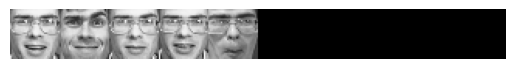

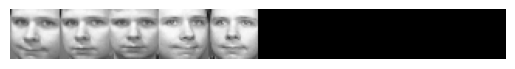

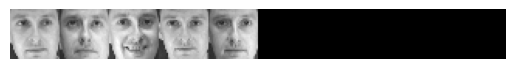

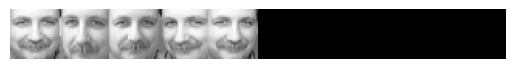

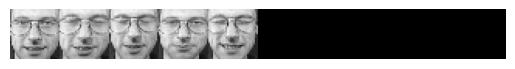

In [9]:
# Your code goes here
from sklearn.metrics import confusion_matrix
# Calculate the confusion matrix
conf_mat = confusion_matrix(te_label, predicted_y_test)

# Analyze the results and identify the easiest and most difficult subjects to recognize
easiest_subjects = np.argsort(-conf_mat.diagonal())[:5]

# Print the easiest subjects and their test images
print("Easiest subjects to recognize:")
for subject in easiest_subjects:
    # Print the subject ID
    print("Subject ID:", subject+1)
    
    subject_test_images = te_data[(te_label == subject+1).flatten()]
    show_faces(subject_test_images)

 Pick some subjects that are considered the most difficult to recognise by your classifier, and print the misclassified test images from these subjects below.

Most difficult subjects to recognize:
Subject ID: 1
Subject ID: 26
Subject ID: 13
Subject ID: 8
Subject ID: 22


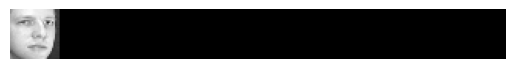

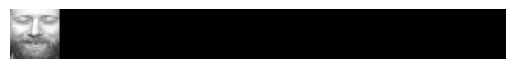

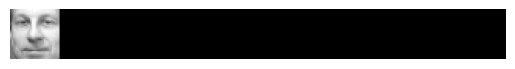

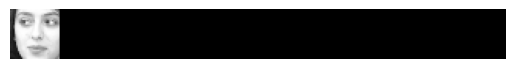

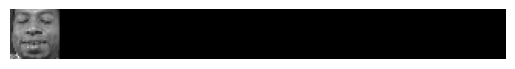

In [10]:
# Your code goes here
# Analyze the results and identify the most difficult subjects to recognize
most_difficult_subjects = np.argsort(conf_mat.diagonal())[:5]

# Print the most difficult subjects and their misclassified test images
print("Most difficult subjects to recognize:")
for subject in most_difficult_subjects:
    # Print the subject ID
    print("Subject ID:", subject+1)
    # Find the misclassified test images for this subject
    subject_test_indices = np.where((te_label == subject+1) & (te_label != predicted_y_test))[0]
    misclassified_images = te_data[subject_test_indices]
    
    # Print the misclassified test images for this subject
    # Assuming you have a function to print images called `print_images`
    show_faces(misclassified_images)

### 4.2 Report

Explain the classification steps, and report your chosen hyper-parameter and results on the test set. Did you notice any common features among the easiest and most difficult subjects to classify? Describe your observations and analyse your results.

## 5. Face Completion (4 Marks, Normal)
In this task you will predict the 512 pixels of the right face from the 512 pixels of the left face by formulating a regression task.

The following command can be used to extract the left and right faces from the input data.

In [11]:
left, right = split_left_right(data)

And you can visualise them with the function `show_split_faces()`:

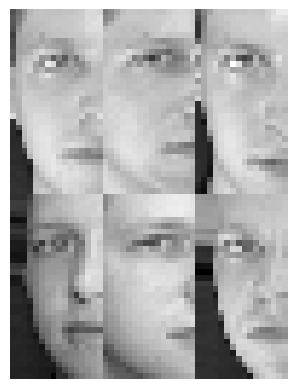

In [12]:
show_split_faces(left[:6, :], num_per_row=3)

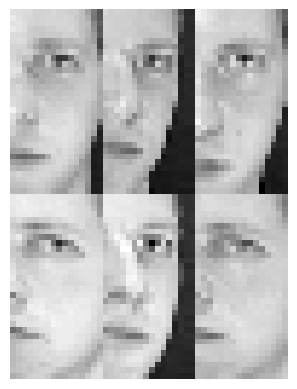

In [13]:
show_split_faces(right[:6, :], num_per_row=3)

### 5.1 Implementation and experiment design

Build a face completion model using your regularised least squares model. Design an experiment to assess your model, which should include appropriate training and testing. Use mean absolute percentage error (MAPE) to evaluate the regression performance. You do not need to bother with hyper-parameter selection, but simply set $\lambda$=0.

Write your code below and make sure it compiles.

In [14]:
# Your code goes here
from sklearn.model_selection import train_test_split

# Split the data into training set and test set
tr_data, te_data, tr_label, te_label = train_test_split(left, right, test_size=0.2, random_state=42)

# Train the model using lambda = 0
lmbd = 0
w = l2_rls_train(tr_data, tr_label, lmbd)

# Make the predication
predicted_y = l2_rls_predict(w, te_data)
print(predicted_y)

mape = np.mean(np.abs((te_label - predicted_y) / te_label)) * 100

print("Mean Absolute Percentage Error (MAPE):", mape)


[[ 0.67633021  0.68578253  0.69980237 ...  0.50328099  0.40826063
   0.52289654]
 [ 0.36609845  0.42920771  0.41340532 ...  0.27662092  0.18212282
   0.21356289]
 [ 0.75682476  0.75587765  0.7418577  ...  0.27471249  0.06554999
   0.20793024]
 ...
 [ 0.84774925  0.8738808   0.86210228 ...  0.28751298  0.34101581
  -0.07602642]
 [ 0.7664535   0.75243679  0.77566831 ...  0.45086741  0.68629896
   0.55098997]
 [ 0.41946361  0.49176706  0.47758891 ...  0.41818504  0.27248292
   0.24264765]]
Mean Absolute Percentage Error (MAPE): 27.976507690591625


Visualise and compare the ground truth face (include both the left and right parts) and the completed face (include both the true left and predicted right parts) for 3 randomly chosen testing samples below. You can use `join_left_right(left, right)` to concatenate the left and right halves of a set of faces.

Ground truth faces
Completed faces


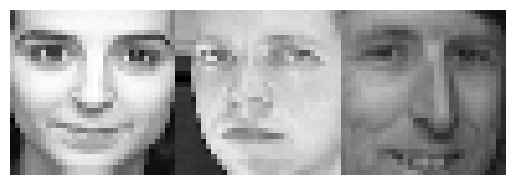

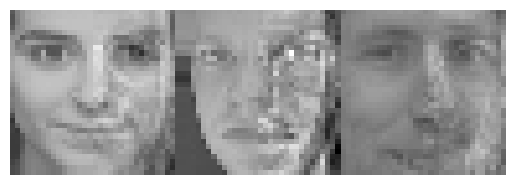

In [15]:
# Your code goes here

# Randomly choose three test samples
random_test_ind = np.random.choice(te_data.shape[0], 3, replace=False)

# Get the true left and right halves from the selected test samples
left_true_samples = te_data[random_test_ind]
right_true_samples = te_label[random_test_ind]

# Get the predicted right parts from the selected test samples
right_predicted_samples = predicted_y[random_test_ind]

# The ground truth faces
ground_truth_faces = join_left_right(left_true_samples, right_true_samples)

# The completed faces
completed_faces = join_left_right(left_true_samples, right_predicted_samples)

# Visualise the Ground truth faces
print("Ground truth faces")
for i in range(0, len(ground_truth_faces), 3):
    show_split_faces(ground_truth_faces[i:i + 3], 3, h=32, w=32)

# Visualise Completed faces
print("Completed faces")
for i in range(0, len(completed_faces), 3):
    show_split_faces(completed_faces[i:i + 3], 3, h=32, w=32)

### 5.2 Report

Report the MAPE and make some observations regarding the results of the face completion model. How well has your model performed? Offer one suggestion for how it can be improved.


## 6. Training linear least squares model via gradient descent (5 marks, Normal)
For these experiments you will be performing **binary classification.** 
### 6.1 GD Implementation
Now, implement the function `lls_gd_train` below. 

`lls_gd_train` trains a single-output linear model by minimising the sum of squares loss using the gradient descent approach. It should take the iteration number $N$ and the learning rate $\eta$ as the input. To keep things simple, you can fix the initial guess of the model weights $\mathbf{w}$ as zeros. It should record and return the weights and costs of linear least squares model calculated in all the iterations.

In [16]:
def lls_gd_train(data, labels, N, eta):
    """
    A summary of your function goes here.

    data: type and description of "data"
    labels: type and description of "labels"

    Returns: type and description of the returned variable(s).
    """
    
    # This is just to be consistent with the lecture notes.
    X, y = data, labels
    
    # Expand X with a column of ones.
    X_tilde = np.column_stack((X, np.ones(X.shape[0])))
    
    # Weight initialization
    w = np.zeros(X_tilde.shape[1])

    # Initialise arrays to store weights and cost at each iteration
    w_all = np.zeros((N, w.shape[0]))
    cost_all = np.zeros(N)
    
    
    # GD update of weights
    for i in range(N):
        
        # cost and gradient descent of the linear least squares model
        predicted_y = np.dot(X_tilde, w)
        error = predicted_y - y
        gd = np.dot(X_tilde.T, error)
        cost = 0.5 * np.sum(error ** 2)
        
        # Weight update
        w = w - eta * gd
        
        # save w and cost of each iteration in w_all and cost_all 
        w_all[i, :] = w
        cost_all[i] = cost
    
    
    # Return model parameters.
    return cost_all, w_all

### 6.2 Experiments

Apply this function to classify images from subject 1 and subject 30. You only need to conduct the experiment for one training-test trial, where 3 images from each subject are used for training and the remaining 7 images for testing.

Set your learning rate small, e.g., $\eta=10^{-3}$, and use a reasonable iteration number, e.g., $N=200$, to train your model. Plot in three figures (1) the change of your sum-of-squares error loss that you minimise, (2) the change of the classification accuracy for training samples, and (3) the change of the classification accuracy for test samples over iterations. Write your code below and make sure it runs. 

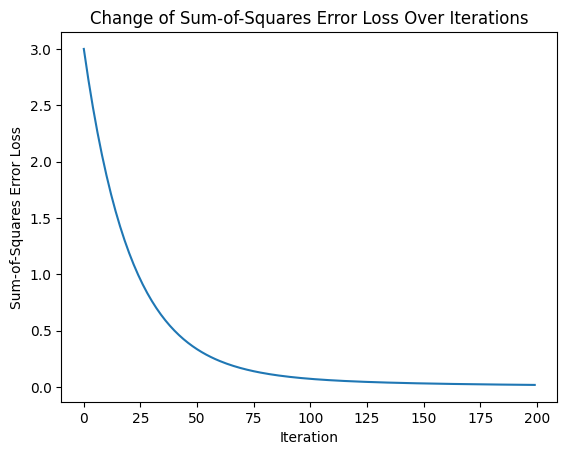

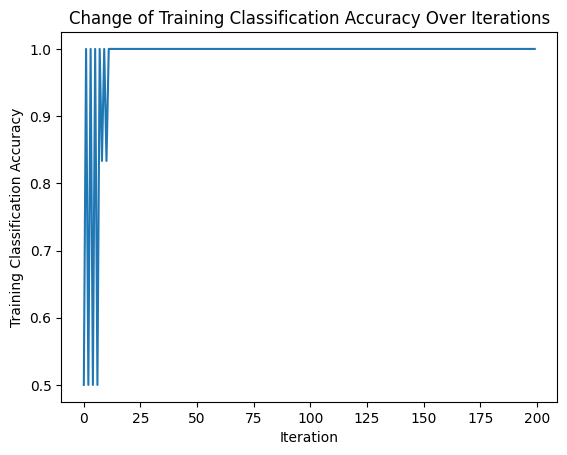

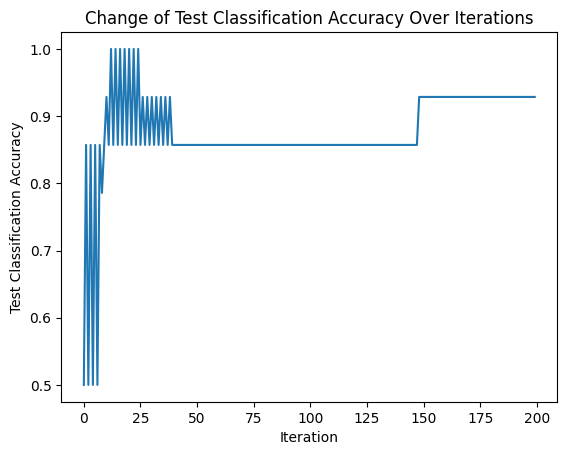

In [17]:
# Your code goes here

import matplotlib.pyplot as plt

def label_classify(predicted_y):
    for i in range(len(predicted_y)):
        if predicted_y[i] > 0:
            predicted_y[i] = 1
        else: 
            predicted_y[i] = -1
    
# Select data from subject 1 and subject 30
subject_1 = data[labels == 1]
subject_30 = data[labels == 30]

# Combine the selected data and labels
combined_data = np.vstack((subject_1, subject_30))
combined_labels = np.hstack((np.ones(subject_1.shape[0]), -1 * np.ones(subject_30.shape[0])))

# Split data into training and test sets, 3 for training and 7 for test
tr_ind, te_ind = partition_data(combined_labels, num_per_class=3)
tr_data = combined_data[tr_ind, :]
tr_label = combined_labels[tr_ind]
te_data = combined_data[te_ind, :]
te_label = combined_labels[te_ind]

# Set your learning rate samll eta = 1e-3 and reasonable iteration number = 200
eta = 1e-3
N = 200

# Train the model using lls_gd_train
cost_all, w_all = lls_gd_train(tr_data, tr_label, N, eta)

# Initialise the training and test accuracy
training_accuracy = []
test_accuracy = []

for i in range(N):
    num_rows_training = tr_data.shape[0]
    ones_column_training = np.ones((num_rows_training, 1))
    X_tilde_training = np.hstack((ones_column_training, tr_data))
    predicted_y_training = X_tilde_training @ w_all[i]
    label_classify(predicted_y_training)
    training_accuracy.append(np.mean(predicted_y_training == tr_label))

    num_rows_test = te_data.shape[0]
    ones_column_test = np.ones((num_rows_test, 1))
    X_tilde_test = np.hstack((ones_column_test, te_data))
    predicted_y_test = X_tilde_test @ w_all[i]
    label_classify(predicted_y_test)
    test_accuracy.append(np.mean(predicted_y_test == te_label))

# Plot the sum-of-squares error loss, training classification accuracy, and test classification accuracy
plt.figure()
plt.plot(cost_all)
plt.xlabel("Iteration")
plt.ylabel("Sum-of-Squares Error Loss")
plt.title("Change of Sum-of-Squares Error Loss Over Iterations")

plt.figure()
plt.plot(training_accuracy)
plt.xlabel("Iteration")
plt.ylabel("Training Classification Accuracy")
plt.title("Change of Training Classification Accuracy Over Iterations")

plt.figure()
plt.plot(test_accuracy)
plt.xlabel("Iteration")
plt.ylabel("Test Classification Accuracy")
plt.title("Change of Test Classification Accuracy Over Iterations")

plt.show()

Try a larger learning rate, e.g., $\eta=10^{-2}$, and produce the same three plots by training the model for $N=200$ iterations. Write your code below and make sure it runs. 

/var/folders/kz/k0_p6dhx0lb5myxy10_thxxw0000gn/T/ipykernel_53982/3311689634.py:32: RuntimeWarning: overflow encountered in square
  cost = 0.5 * np.sum(error ** 2)


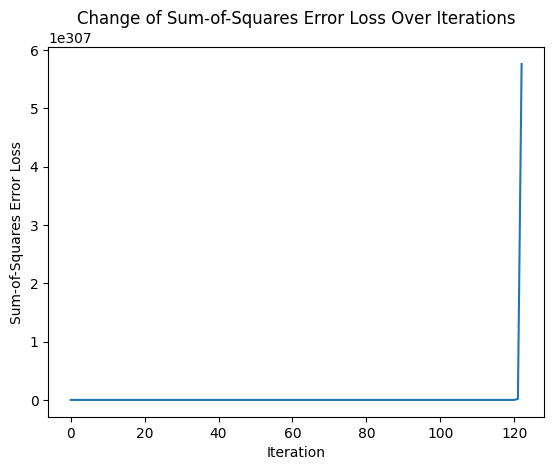

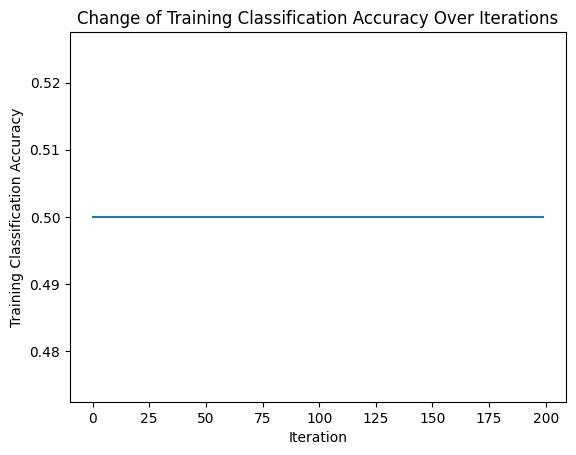

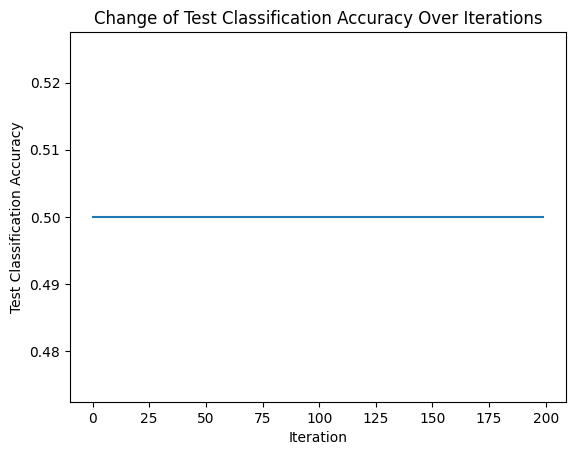

In [18]:
# Your code goes here
# Set your learning rate samll eta = 1e-3 and reasonable iteration number = 200
eta = 1e-2
N = 200

# Train the model using lls_gd_train
cost_all, w_all = lls_gd_train(tr_data, tr_label, N, eta)

# Initialise the training and test accuracy
training_accuracy = []
test_accuracy = []

for i in range(N):
    num_rows_training = tr_data.shape[0]
    ones_column_training = np.ones((num_rows_training, 1))
    X_tilde_training = np.hstack((ones_column_training, tr_data))
    predicted_y_training = X_tilde_training @ w_all[i]
    label_classify(predicted_y_training)
    training_accuracy.append(np.mean(predicted_y_training == tr_label))

    num_rows_test = te_data.shape[0]
    ones_column_test = np.ones((num_rows_test, 1))
    X_tilde_test = np.hstack((ones_column_test, te_data))
    predicted_y_test = X_tilde_test @ w_all[i]
    label_classify(predicted_y_test)
    test_accuracy.append(np.mean(predicted_y_test == te_label))

# Plot the sum-of-squares error loss, training classification accuracy, and test classification accuracy
plt.figure()
plt.plot(cost_all)
plt.xlabel("Iteration")
plt.ylabel("Sum-of-Squares Error Loss")
plt.title("Change of Sum-of-Squares Error Loss Over Iterations")

plt.figure()
plt.plot(training_accuracy)
plt.xlabel("Iteration")
plt.ylabel("Training Classification Accuracy")
plt.title("Change of Training Classification Accuracy Over Iterations")

plt.figure()
plt.plot(test_accuracy)
plt.xlabel("Iteration")
plt.ylabel("Test Classification Accuracy")
plt.title("Change of Test Classification Accuracy Over Iterations")

plt.show()

### 6.3 Report

How did you choose the learning rate and iteration number? Explain your results.

## 7. Advanced Gradient-based Training
For this section, you may choose to implement **either Option 1: SGD** (4 marks), or **Option 2: GD with hinge loss** (7 marks). 

*Please note: Option 1 is easier, but gives fewer potential marks. Option 2 is designed to be a steep challenge, potentially involves mathematical derivations not shown in your notes, and will be marked rigorously. Choose wisely!*

### Option 1: Compare with stochastic gradient descent training (4 marks, Normal)
### 7.1 SGD Implementation 
Replace the gradient descent approach that you did in Section 4 with a stochastic gradient descent approach. Your new implementation can be named as `lls_sgd_train`. You can adopt a similar implementation template to that of your `lls_gd_train` function.

In [19]:
# Your code goes here
# def lls_sgd_train(data, labels, N, eta):
#     """
#     A summary of your function goes here.

#     data: type and description of "data"
#     labels: type and description of "labels"

#     Returns: type and description of the returned variable(s).
#     """
    
#     # This is just to be consistent with the lecture notes.
#     X, y = data, labels
    
#     # Expand X with a column of ones.
#     X_tilde = np.column_stack((X, np.ones(X.shape[0])))
    
#     # Weight initialization
#     w = np.zeros(X_tilde.shape[1])

#     # Initialise arrays to store weights and cost at each iteration
#     w_all = np.zeros((N, w.shape[0]))
#     cost_all = np.zeros(N)
    
    
#     # Stochastic Gradient Descent Approach
#     for i in range(N):
        
#         # Randomly select a single data point
#         idx = np.random.randint(X_tilde.shape[0])
#         data_sample = X_tilde[idx, :].reshape(1, -1)
#         label_sample = y[idx]
        
#         # Gradient descent and cost of Stochastic Gradient Descent method
#         gd = -2 * (label_sample - data_sample @ w) * data_sample.T
#         cost = (label_sample - data_sample @ w) ** 2
        
#         # Weight update
#         w = w - eta * gd
        
#         # save w and cost of each iteration in w_all and cost_all 
#         w_all[i] = w
#         cost_all[i] = cost
    
    
#     # Return model parameters.
#     return cost_all, w_all

In [20]:
def lls_sgd_train(data, labels, N, eta):
    X, y = data, labels
    X_tilde = np.column_stack((X, np.ones(X.shape[0])))
    w = np.zeros(X_tilde.shape[1])

    w_all = np.zeros((N, w.shape[0]))
    cost_all = np.zeros(N)

    num_samples = X_tilde.shape[0]

    for i in range(N):
        # Select a random sample
        idx = np.random.randint(num_samples)
        data_i = X_tilde[idx, :].reshape(1, -1)
        label_i = y[idx]

        # Calculate the gradient and cost for the current sample
        pred_i = np.dot(data_i, w)
        error_i = label_i - pred_i
        gd = -2 * data_i.T * error_i
        cost = error_i ** 2

        # Update the weights
        w = w - eta * gd.ravel()

        # Save the weights and cost at each iteration
        w_all[i] = w
        cost_all[i] = cost

    return cost_all, w_all


### 7.2 Experiment Design
Design and implement an appropriate experiment to demonstrate the performance and behaviour difference between gradient descent and stochastic gradient descent. 


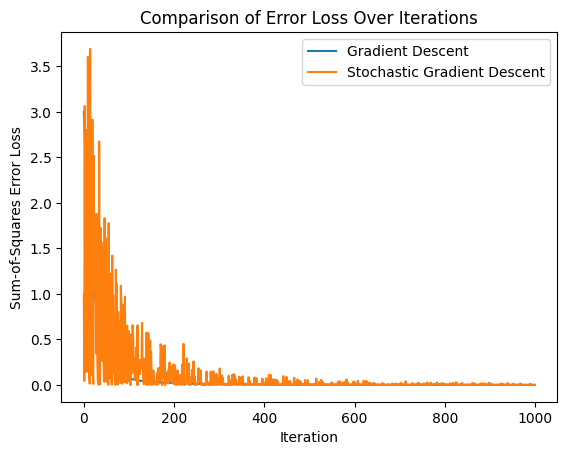

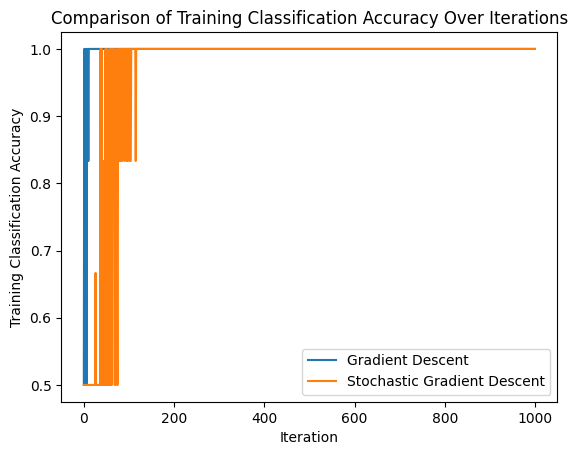

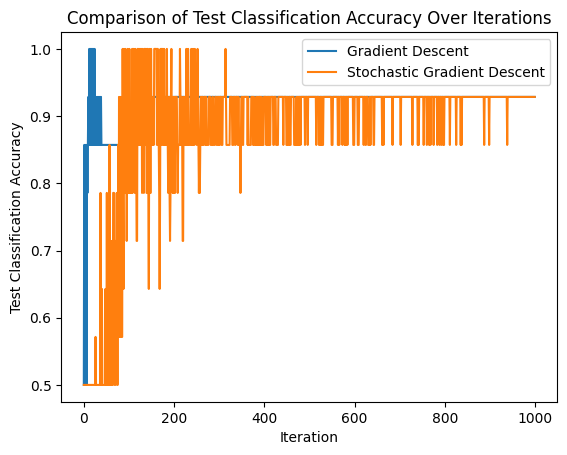

In [21]:
# Your code goes here

# Set your learning rate samll eta = 1e-3 and reasonable iteration number = 200
eta = 1e-3
N = 1000

# Train the model using lls_gd_train
cost_all_gd, w_all_gd = lls_gd_train(tr_data, tr_label, N, eta)

# Train the model using lls_sgd_train
cost_all_sgd, w_all_sgd = lls_sgd_train(tr_data, tr_label, N, eta)

# Initialise the training and test accuracy
training_accuracy_gd = []
test_accuracy_gd = []
training_accuracy_sgd = []
test_accuracy_sgd = []

for i in range(N):
    num_rows_training = tr_data.shape[0]
    ones_column_training = np.ones((num_rows_training, 1))
    X_tilde_training = np.hstack((ones_column_training, tr_data))
    predicted_y_training_gd = X_tilde_training @ w_all_gd[i]
    label_classify(predicted_y_training_gd)
    training_accuracy_gd.append(np.mean(predicted_y_training_gd == tr_label))
    
    predicted_y_training_sgd = X_tilde_training @ w_all_sgd[i]
    label_classify(predicted_y_training_sgd)
    training_accuracy_sgd.append(np.mean(predicted_y_training_sgd == tr_label))
    
    
    num_rows_test = te_data.shape[0]
    ones_column_test = np.ones((num_rows_test, 1))
    X_tilde_test = np.hstack((ones_column_test, te_data))
    predicted_y_test_gd = X_tilde_test @ w_all_gd[i]
    label_classify(predicted_y_test_gd)
    test_accuracy_gd.append(np.mean(predicted_y_test_gd == te_label))
    
    predicted_y_test_sgd = X_tilde_test @ w_all_sgd[i]
    label_classify(predicted_y_test_sgd)
    test_accuracy_sgd.append(np.mean(predicted_y_test_sgd == te_label))

# Comparison of Error Loss Over Iterations
plt.figure()
plt.plot(cost_all_gd, label="Gradient Descent")
plt.plot(cost_all_sgd, label="Stochastic Gradient Descent")
plt.xlabel("Iteration")
plt.ylabel("Sum-of-Squares Error Loss")
plt.title("Comparison of Error Loss Over Iterations")
plt.legend()

# Comparison of Training Classification Accuracy Over Iterations
plt.figure()
plt.plot(training_accuracy_gd, label="Gradient Descent")
plt.plot(training_accuracy_sgd, label="Stochastic Gradient Descent")
plt.xlabel("Iteration")
plt.ylabel("Training Classification Accuracy")
plt.title("Comparison of Training Classification Accuracy Over Iterations")
plt.legend()

# Comparison of Test Classification Accuracy Over Iterations
plt.figure()
plt.plot(test_accuracy_gd, label="Gradient Descent")
plt.plot(test_accuracy_sgd, label="Stochastic Gradient Descent")
plt.xlabel("Iteration")
plt.ylabel("Test Classification Accuracy")
plt.title("Comparison of Test Classification Accuracy Over Iterations")
plt.legend()

plt.show()

### 7.3 Report

Explain in the report your experiment design, comparative result analysis and interpretation of obtained results. Try to be thorough in your analysis.

**Remember that all graphs should have axis labels and a title.**

### Option 2: Gradient descent training using hinge loss (7 marks, Hard)
Here is a recap of Hinge loss. For a single output model, the hinge loss over N training samples is $$O(\theta) = \sum^N_{i=1}\max\left(0, 1 - y_i f(\theta, x_i)\right)$$ where $y_i \in \{-1, +1\}$ is the class target label and $f(\theta, x_i)$ is your prediction function. While this is not directly differentiable, we can split it into two separately differentiable parts. For one sample, the above formuation is equivalent to:
$$
\max\left(0, 1 - y_i f(\theta, x_i)\right) = \begin{cases}
    0 & \text{if } y_i f(\theta, x_i) \geq 1 \\ % & is your "\tab"-like command (it's a tab alignment character)
    1-y_i f(\theta, x_i) & \text{otherwise.}
\end{cases}
$$

### 7.1 Implementation
Apply the gradient descent approach to train your classifier but by minimising the hinge loss. Implement the function `hinge_gd_train` below. 

`hinge_gd_train` trains a single-output linear model by minimising the hinge loss using the gradient descent approach. The optimisation function should include a regularisation term and regularisation hyperparameter $C$. It should take the iteration number $N$, the learning rate $\eta$, and regularisation hyperparameter $C$ as arguments. To keep things simple, you can fix the initial guess of the model weights $\mathbf{w}$ as zeros. It should record and return the weights and costs of the regularised hinge loss model calculated in all the iterations.

In [22]:
def hinge_gd_train(data, labels, learning_rate, N, C):
    """
    A summary of your function goes here.

    data: type and description of "data"
    labels: type and description of "labels"

    Returns: type and description of the returned variable(s).
    """
    # This is just to be consistent with the lecture notes.
    X, y = data, labels
    X_tilde = np.column_stack((X, np.ones(X.shape[0])))
    w = np.zeros(X_tilde.shape[1])

    # Initialise arrays to store weights and cost at each iteration
    w_all = np.zeros((N, w.shape[0]))
    cost_all = np.zeros(N)

    # Your code goes here
    
    # GD update of weights
    for i in range(N):
        # Compute the prediction and margin.
        predicted_y = np.dot(X_tilde, w)
        margin = y * predicted_y
        
        # Compute the hinge loss.
        hinge_loss = np.maximum(0, 1 - margin)
        
        # cost and gradient descent of the linear hinge loss model
        
        # Compute the cost with regularization
        cost = np.sum(hinge_loss) + 0.5 * C * np.sum(w**2)
        cost_all[i] = cost
        
        # Compute the gradient of the hinge loss.
        hinge_grad = -np.dot((margin < 1) * y, X_tilde) + C * w
        
        # Update the weights.
        w -= learning_rate * hinge_grad
        
        # save w and cost of each iteration in w_all and cost_all
        w_all[i, :] = w

    # Return model parameters.
    return cost_all, w_all


### 7.2 Experiment design
Design and implement an appropriate experiment to demonstrate the performance and behaviour difference for gradient descent training based on the least squared loss and the hinge loss. 


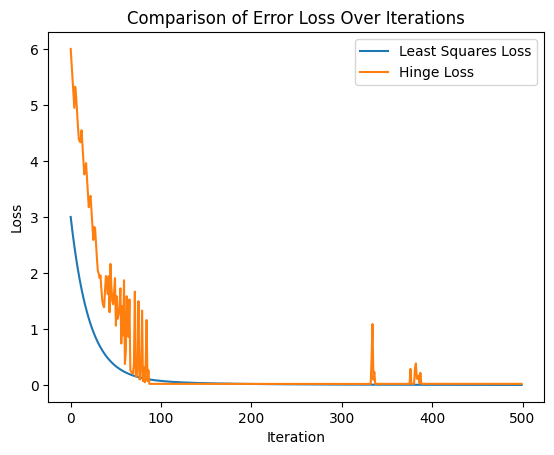

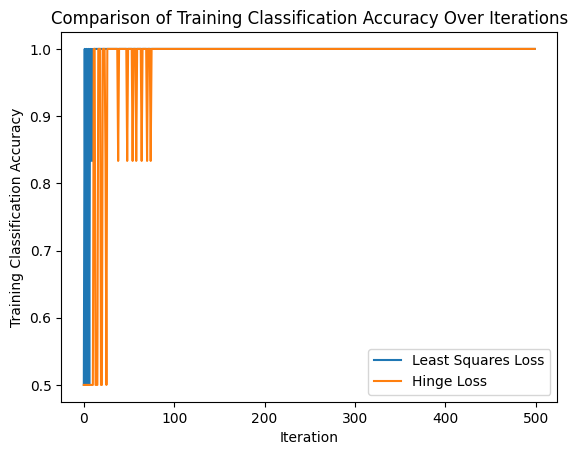

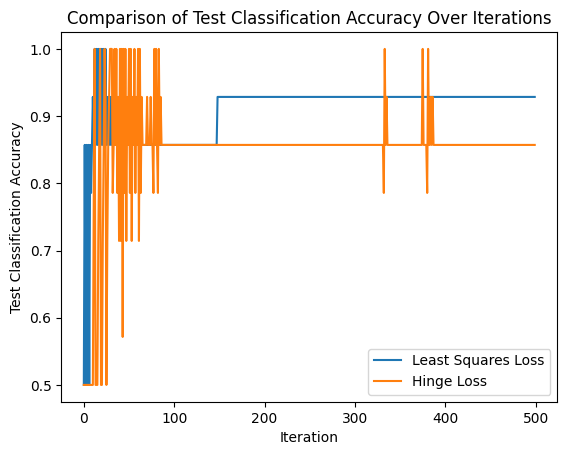

In [23]:
# Your code goes here
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# initialize the sample values, hyperparamenter value and learning rate
N = 500
eta = 1e-3
C = 0.1

# Train the model using lls_gd_train
cost_all_lls, w_all_lls = lls_gd_train(tr_data, tr_label, N, eta)
# print(cost_all_lls)

# Train the model using hinge_gd_train
cost_all_hinge, w_all_hinge = hinge_gd_train(tr_data, tr_label, eta, N, C)
# print(cost_all_hinge)

# Initialise the training and test accuracy
training_accuracy_lls = []
test_accuracy_lls = []
training_accuracy_hinge = []
test_accuracy_hinge = []

for i in range(N):
    num_rows_training = tr_data.shape[0]
    ones_column_training = np.ones((num_rows_training, 1))
    X_tilde_training = np.hstack((ones_column_training, tr_data))
    predicted_y_training_lls = X_tilde_training @ w_all_lls[i]
    label_classify(predicted_y_training_lls)
    training_accuracy_lls.append(np.mean(predicted_y_training_lls == tr_label))
    
    predicted_y_training_hinge = X_tilde_training @ w_all_hinge[i]
    label_classify(predicted_y_training_hinge)
    training_accuracy_hinge.append(np.mean(predicted_y_training_hinge == tr_label))
    
    
    num_rows_test = te_data.shape[0]
    ones_column_test = np.ones((num_rows_test, 1))
    X_tilde_test = np.hstack((ones_column_test, te_data))
    predicted_y_test_lls = X_tilde_test @ w_all_lls[i]
    label_classify(predicted_y_test_lls)
    test_accuracy_lls.append(np.mean(predicted_y_test_lls == te_label))
    
    predicted_y_test_hinge = X_tilde_test @ w_all_hinge[i]
    label_classify(predicted_y_test_hinge)
    test_accuracy_hinge.append(np.mean(predicted_y_test_hinge == te_label))


# visualize the comparing result 
plt.figure()
plt.plot(cost_all_lls, label="Least Squares Loss")
plt.plot(cost_all_hinge, label="Hinge Loss")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()
plt.title("Comparison of Error Loss Over Iterations")

# Comparison of Training Classification Accuracy Over Iterations
plt.figure()
plt.plot(training_accuracy_lls, label="Least Squares Loss")
plt.plot(training_accuracy_hinge, label="Hinge Loss")
plt.xlabel("Iteration")
plt.ylabel("Training Classification Accuracy")
plt.title("Comparison of Training Classification Accuracy Over Iterations")
plt.legend()

# Comparison of Test Classification Accuracy Over Iterations
plt.figure()
plt.plot(test_accuracy_lls, label="Least Squares Loss")
plt.plot(test_accuracy_hinge, label="Hinge Loss")
plt.xlabel("Iteration")
plt.ylabel("Test Classification Accuracy")
plt.title("Comparison of Test Classification Accuracy Over Iterations")
plt.legend()

plt.show()
# w_lls = w_all_lls[-1, :]
# w_hinge = w_all_hinge[-1, :]

# def predict_function(X, w):
#     X_tilde = np.column_stack((X, np.ones(X.shape[0])))
#     predicted_y = np.dot(X_tilde, w)
#     return np.sign(predicted_y)

# predicted_y_test_lls = predict_function(te_data, w_lls)
# predicted_y_test_hinge = predict_function(te_data, w_hinge)

# accuracy_lls = accuracy_score(te_label, predicted_y_test_lls)
# accuracy_hinge = accuracy_score(te_label, predicted_y_test_hinge)

# print("Test accurary for lls:", accuracy_lls)
# print("Test accuracy for hinge loss:", accuracy_hinge)


### 7.3 Report

Explain in your report the following: 

(1) Your implementation of `hinge_gd_train`. If you analytically derived the loss function, please include it here.

(2) Your experiment design, comparative result analysis and interpretation of obtained results. 

**Remember that all graphs should have axis labels and a title.**